# Week 2

## MNIST data

In [1]:
ls

train-images-idx3-ubyte.gz  week_2.ipynb
train-labels-idx1-ubyte.gz  week_2_prep.ipynb


In [2]:
pwd

'/Users/bb/Documents/GitHub/MTH548/preps/week_2'

In [18]:
import gzip

In [19]:
with gzip.open("train-images-idx3-ubyte.gz", 'rb') as foo:
    f = foo.read()

In [5]:
f[:20]

b'\x00\x00\x08\x03\x00\x00\xea`\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x00'

In [6]:
f[6]

234

In [8]:
ord("`")

96

In [7]:
for x in  f[:20]:
    print(x)

0
0
8
3
0
0
234
96
0
0
0
28
0
0
0
28
0
0
0
0


In [20]:
import numpy as np

In [21]:
images = np.array([b for b in f[16:]]).reshape(-1, 28*28)

In [15]:
images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
images.shape

(60000, 784)

In [12]:
img = images[90].reshape(28, 28)
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  25, 214, 225,  90,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7, 145, 212, 253, 253,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 106, 253, 253, 246, 188,  23,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 164, 254, 253, 223, 108,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
with np.printoptions(linewidth=5*28):
    print(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25 214 225  90   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   7 145 212 253 253  60   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 106 253 253 246 188  23   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  45 164 254 253 223 108   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  24 236 253 252 124  28   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 100 217 253 218 116   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 158 175 225 253  92   0   0   0   0   

([], [])

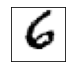

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1, 1))
plt.imshow(img, cmap="Greys")
plt.xticks([])
plt.yticks([])

In [22]:
with gzip.open("train-labels-idx1-ubyte.gz", 'rb') as foo:
    f = foo.read()

f[:20]

b'\x00\x00\x08\x01\x00\x00\xea`\x05\x00\x04\x01\t\x02\x01\x03\x01\x04\x03\x05'

In [23]:
labels = np.array([b for b in f[8:]])
labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [30]:
labels[90]

6

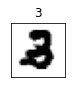

In [15]:
N = 46689
img = images[N].reshape(28, 28)
label = labels[N]
plt.figure(figsize=(1, 1))
plt.imshow(img, cmap="Greys")
plt.xticks([])
plt.yticks([])
plt.title(label);

## k-NN

* Start with training data.
* Given a new data point $x$ compute its distance from all training data points.
* Select $k$ nearest neighbors of $x$ and check their labels.
* The label which appears most often is assigned to point $x$ (decide what to do with ties).

Distances:

* Euclidean
* $L_p$ (in particular $L_1$)

## 2 - dimensional sample data

Create blobs with sklearn:

In [12]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples = 10,
    n_features = 2, 
    centers = 4, 
    cluster_std = 1, 
    random_state = 1
)

X, y

(array([[ -7.23731039,  -9.03108652],
        [ -8.86394306,  -5.05323981],
        [ -7.37541495,  -1.94406175],
        [ -5.37320505,  -2.58629112],
        [  0.08525186,   3.64528297],
        [-10.32012971,  -4.3374029 ],
        [ -0.79415228,   2.10495117],
        [ -7.02266844,  -7.57041289],
        [ -1.34052081,   4.15711949],
        [ -8.53560457,  -6.01348926]]),
 array([2, 1, 3, 3, 0, 1, 0, 2, 0, 1]))

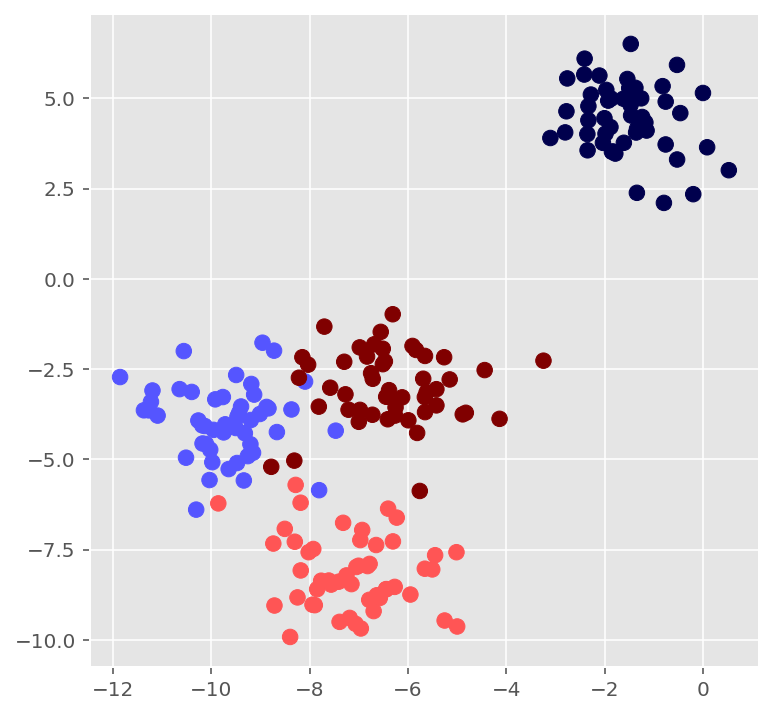

In [13]:
X, y = make_blobs(
    n_samples = 200,
    n_features = 2, 
    centers = 4, 
    cluster_std = 1, 
    random_state = 1
)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap="seismic")

In [52]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

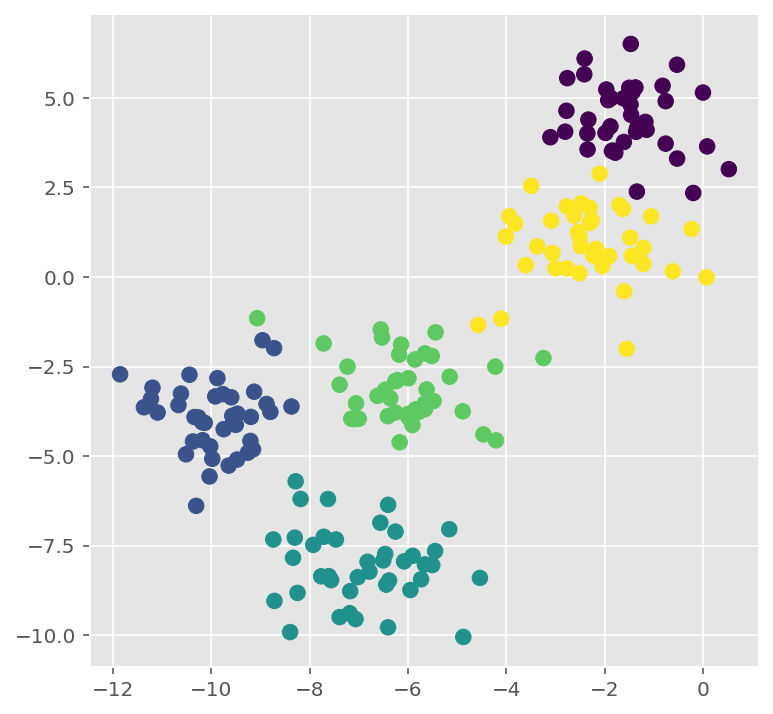

In [5]:
X, y = make_blobs(
    n_samples = 200,
    n_features = 2, 
    centers = 5, 
    cluster_std = 1, 
    random_state = 1
)

plt.style.use('ggplot')
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap="viridis")

In [14]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize


def plot_clusters(X, y, p=None, p_label=None, neighbors=None):
    """
    Plots nearest neighbors of a given point.

    X:
        A 2-dimensional numpy array with coordinates
        of points in clusters
    y:
        A 1-dimensional numpy array with labels of points
    p:
        An array with coordinates of the point whose
        neighbors will be plotted.
    p_label:
        The predicted label of the point p.
    neighbors:
        A list of row numbers of X which are the nearest
        neighbors of the point p.
    """

    # build a custom colormap
    col_list = ['dodgerblue', 'limegreen', 'red', 'orange', 'fuchsia']
    colors = ListedColormap(col_list)
    norm = Normalize(0, len(col_list))

    plt.figure(figsize=(8, 8))
    with plt.style.context('seaborn'):
        scatter = plt.scatter(X[:, 0],
                              X[:, 1],
                              c=y,
                              s=90,
                              cmap=colors,
                              norm=norm,
                              label=y)
        if p is not None:
            p_col = "k" if p_label is None else colors(norm(p_label))
            plt.plot(p[0], p[1], marker="*", mfc=p_col, mec="k", ms=30, mew=2)
        if neighbors is not None:
            plt.scatter(X[neighbors, 0],
                        X[neighbors, 1],
                        edgecolors='black',
                        linewidth=3,
                        facecolors="None",
                        s=300)
        plt.legend(*scatter.legend_elements(),
                   markerscale=1.5,
                   prop={
                       "size": 12,
                       "weight": "normal"
                   })
    plt.show()

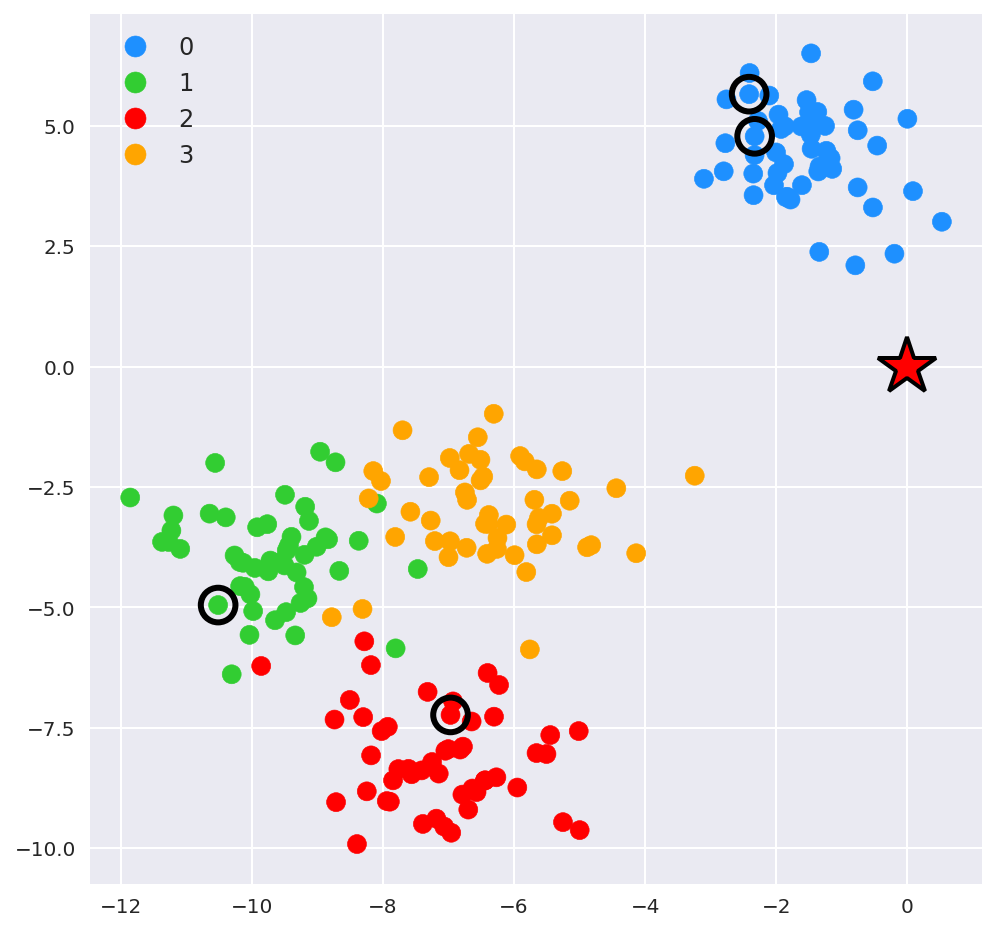

In [16]:
plot_clusters(X, y, p=[0, 0], p_label=2, neighbors=[1, 10, 17, 100])

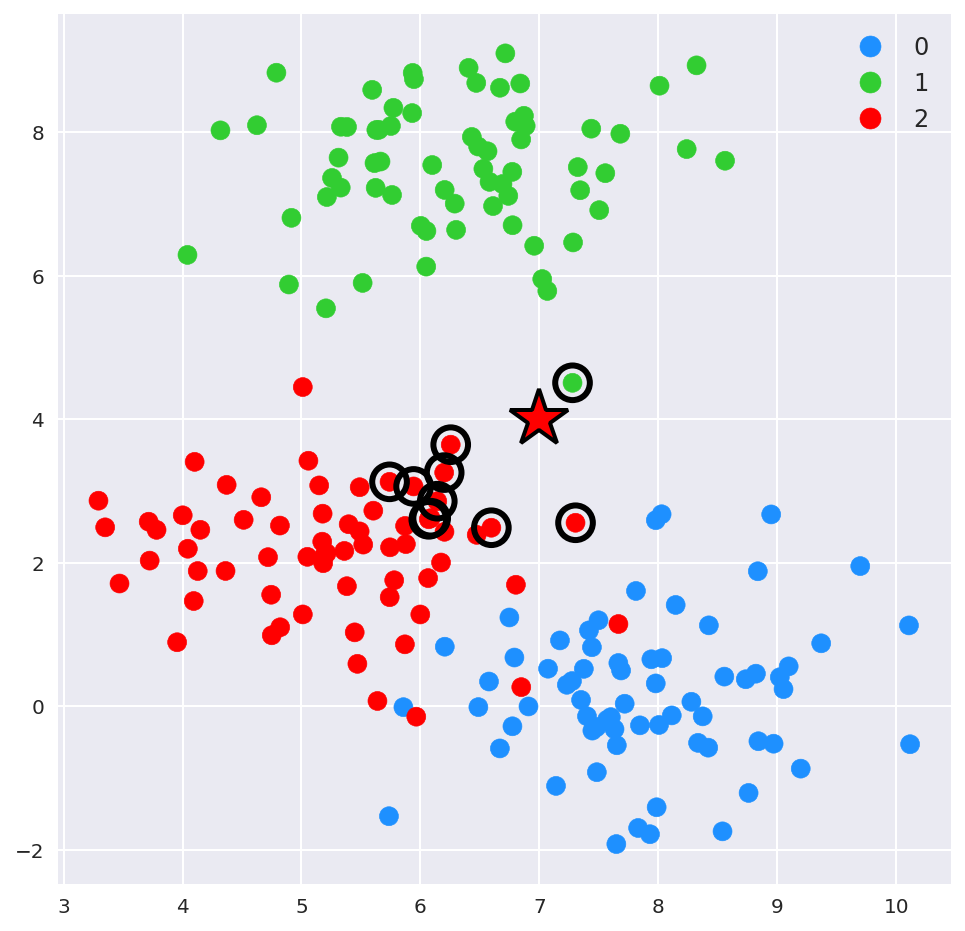

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200,
                  n_features=2,
                  centers=3,
                  center_box=(0, 10),
                  cluster_std=1,
                  random_state=10
                 )
p = [7, 4]
p_label = 2
neighbors = [103, 109,  24, 164, 131,  82, 122,   7,  21,  80]
plot_clusters(X, y, p, p_label, neighbors)

## Training and test data

In [24]:
images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
labels

array([5, 0, 4, ..., 5, 6, 8])

In [27]:
rng = np.random.default_rng(2)
reorder = rng.permutation(len(images))
reorder

array([58490, 29928, 51871, ..., 29028,   840, 22721])

In [28]:
images = images[reorder]
labels = labels[reorder]

In [29]:
train_num = 10000
test_num = 1000

train_images = images[:train_num]
train_labels = labels[:train_num]

test_images = images[train_num: train_num + test_num]
test_labels = labels[train_num: train_num + test_num]

# Confusion matrix

In [30]:
c = rng.integers(0, 100, (10, 10))
c

array([[48, 56,  0, 22, 40, 81, 41, 98, 86, 24],
       [80, 71, 36, 15, 43, 71, 92, 52, 26, 45],
       [23, 27, 87, 15, 70, 34, 56, 58, 59, 91],
       [ 2, 25,  0, 94, 17, 70, 70, 38, 96, 96],
       [80, 77, 36, 11, 72, 35,  0,  4, 59, 87],
       [39, 74, 59, 49, 70, 97, 49, 79, 14, 61],
       [67, 15,  6, 16, 97, 94, 92, 15, 60, 37],
       [32, 79, 55, 88, 78,  3, 75, 14, 14, 32],
       [16, 50, 52, 95, 27, 68, 43, 51, 21,  0],
       [12, 48, 65, 34, 35, 61, 61, 96, 95,  5]])

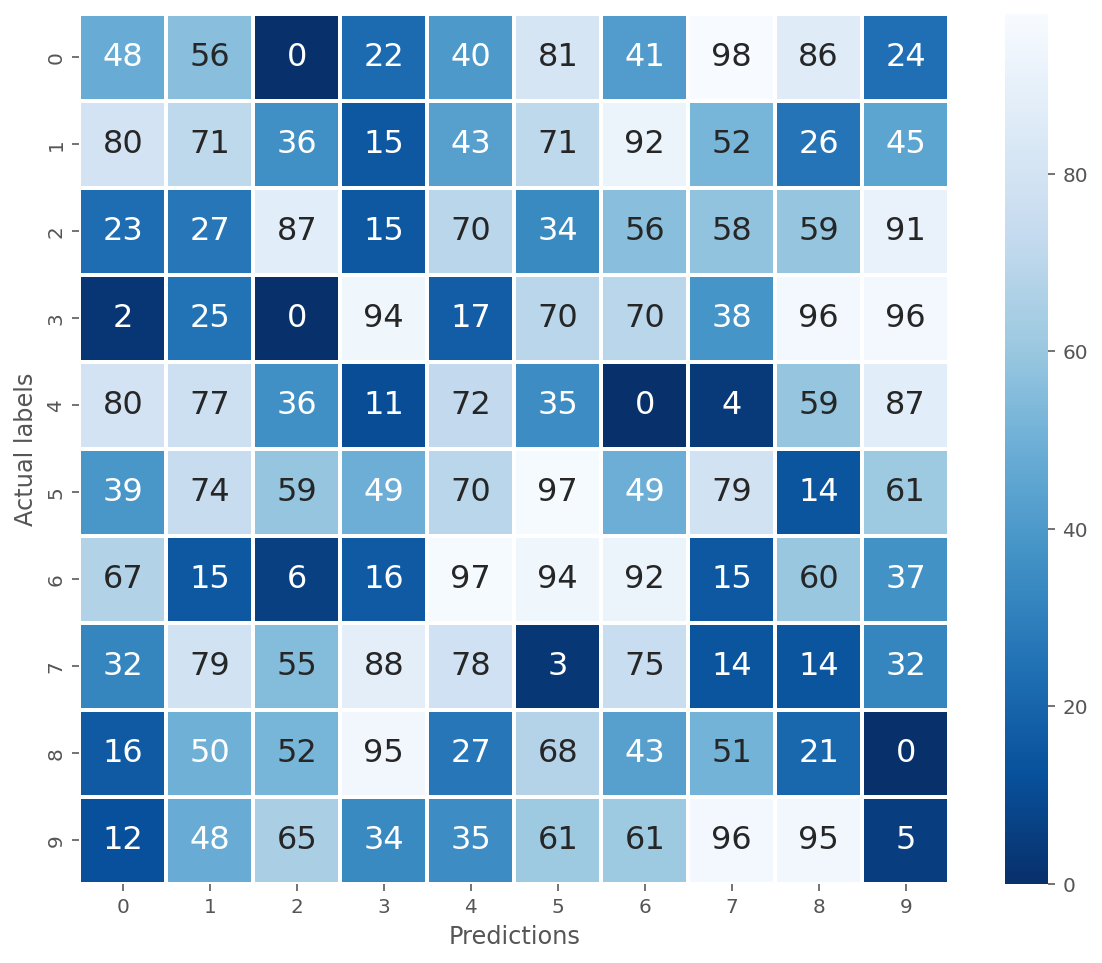

In [43]:
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.heatmap(c, 
            annot=True,
            annot_kws = {"fontsize": 16},
            cbar=True,
            linewidth=2,
            square=True,
            cmap="Blues_r"
            
)
plt.xlabel("Predictions")
plt.ylabel("Actual labels")
plt.show()